# Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

## Descriptive Analytics for Numerical Columns

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("sales_data_with_discounts.csv")

In [3]:
# Check the number of rows and columns in the dataset
df.shape

(450, 13)

In [4]:
# Check first 5 rows, column names, and values in the dataset
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [5]:
# Check column names, number of non-null rows in each column, and datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [6]:
# Store numerical columns in numerical_df DataFrame
numerical_df = df.select_dtypes(include=['number'])

In [7]:
# Check the numerical columns and values in the dataset
numerical_df.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770


In [8]:
# Display numercial column names
numerical_df.columns

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [9]:
# These are the numerical columns in the dataset
# ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

In [10]:
# Calculating the mean, median and standard deviation for numerical_df DataFrame
numerical_df.agg(["mean","median","std"])

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
median,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624


In [11]:
#"Volume" and "Discount Rate(%)"
# The mean and median values of the "Volume" and "Discount Rate(%)" column are close, indicates that the data is symmetrically
# distributed around the mean. Additionally, the standard deviation suggests moderate variability in the data.

# "Avg Price", "Total Sales Value", "Discount Amount" and "Net Sales Value"
# The significant different mean and median values of the "Avg Price", "Total Sales Value", "Discount Amount" and
# "Net Sales Value" column indicate that the data is heavily skewed or influenced by outliers. The Mean being much larger
# than the median suggests a right-skewed distributed centered around the mean. Additionally, the standard deviation suggests
# high variability in the data.

In [12]:
# Calculating the mode for numerical_df DataFrame
numerical_df.agg(["mode"])

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
,mode,mode,mode,mode,mode,mode
0,3.0,400.0,24300.0,5.007822,69.177942,326.974801
1,NaN,450.0,NaN,5.055218,73.025199,330.822058
2,NaN,500.0,NaN,5.059801,93.649161,466.350839
3,NaN,1300.0,NaN,5.072124,94.682735,485.317265
4,NaN,8100.0,NaN,5.084108,102.705757,496.607104
...,...,...,...,...,...,...
445,NaN,NaN,NaN,19.940610,17900.983733,162603.186379
446,NaN,NaN,NaN,19.965340,21153.498820,163915.971000
447,NaN,NaN,NaN,19.976879,21496.675367,163967.080070


In [13]:
# Volume and Total Sales Value column has one mode value

# Avg Price column has 5 mode values

# Discount Rate (%), Discount Amount and Net Sales Value has all unique values

## Data Visualization

### Histograms

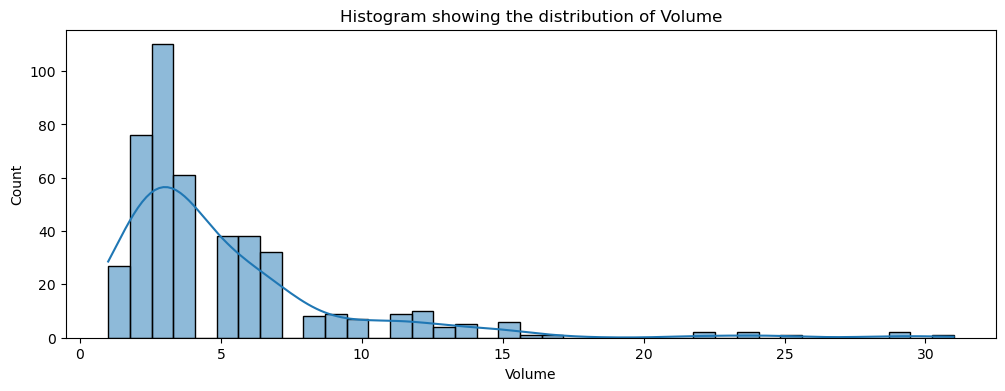

In [14]:
plt.figure(figsize=(12,4))
sns.histplot(data=numerical_df,x="Volume",kde=True)
plt.title("Histogram showing the distribution of Volume")
plt.show()

In [15]:
# Volume column data distribution is right skewed and outliers are present

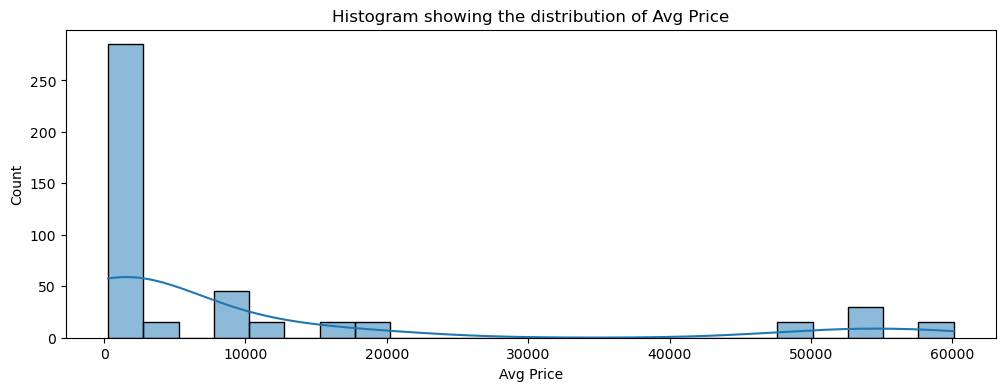

In [16]:
plt.figure(figsize=(12,4))
sns.histplot(data=numerical_df,x="Avg Price",kde=True)
plt.title("Histogram showing the distribution of Avg Price")
plt.show()

In [17]:
# Avg Price column data distribution is right skewed and outliers are present

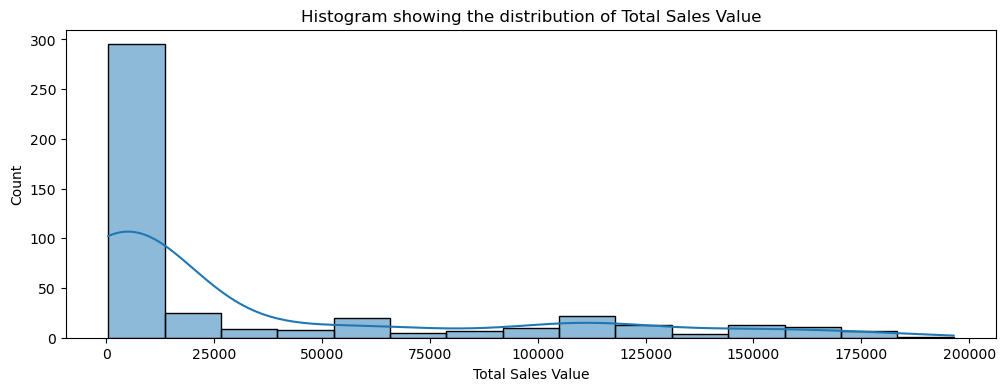

In [18]:
plt.figure(figsize=(12,4))
sns.histplot(data=numerical_df,x="Total Sales Value",kde=True)
plt.title("Histogram showing the distribution of Total Sales Value")
plt.show()

In [19]:
# Total Sales column data distribution is right skewed and outliers are present

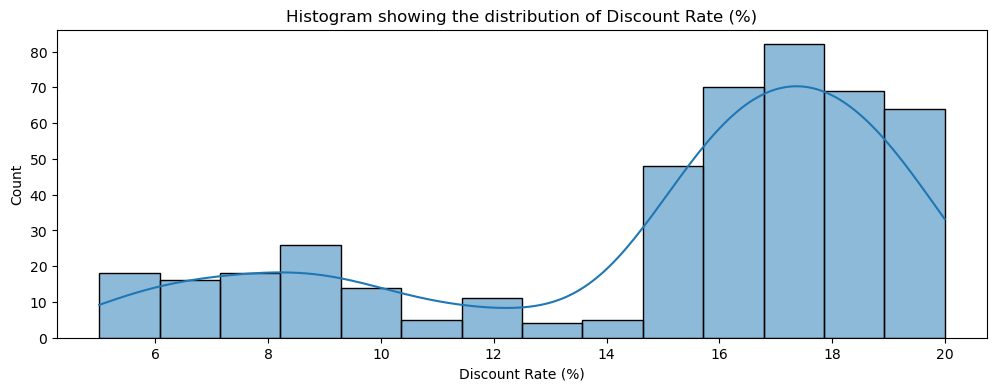

In [20]:
plt.figure(figsize=(12,4))
sns.histplot(data=numerical_df,x="Discount Rate (%)",kde=True)
plt.title("Histogram showing the distribution of Discount Rate (%)")
plt.show()

In [21]:
# Discount Rate (%) column data distribution is left skewed and outliers are present

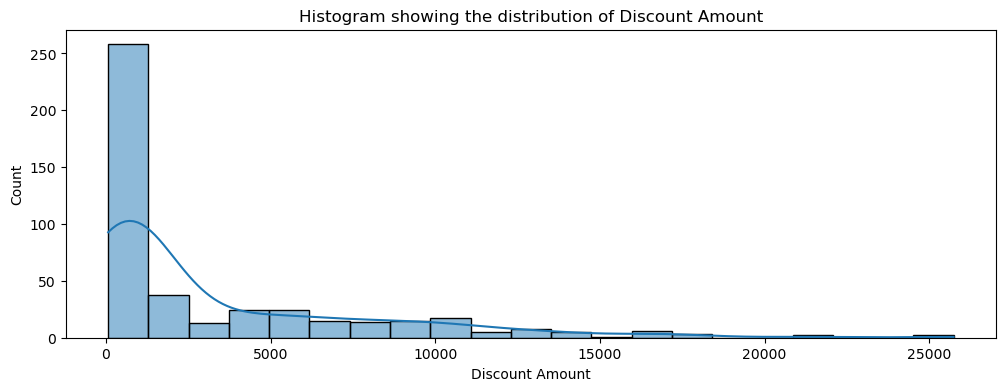

In [22]:
plt.figure(figsize=(12,4))
sns.histplot(data=numerical_df,x="Discount Amount",kde=True)
plt.title("Histogram showing the distribution of Discount Amount")
plt.show()

In [23]:
# Discount Amount column data distribution is right skewed and outliers are present

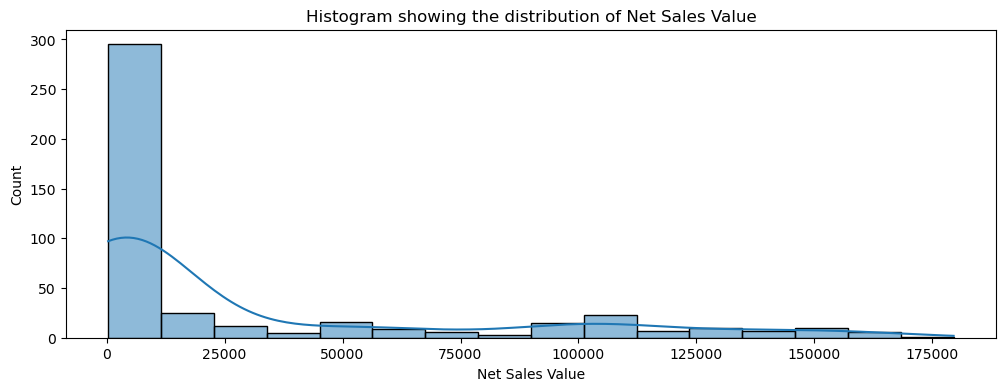

In [24]:
plt.figure(figsize=(12,4))
sns.histplot(data=numerical_df,x="Net Sales Value",kde=True)
plt.title("Histogram showing the distribution of Net Sales Value")
plt.show()

In [25]:
# Discount Amount column data distribution is right skewed and outliers are present

### Boxplots

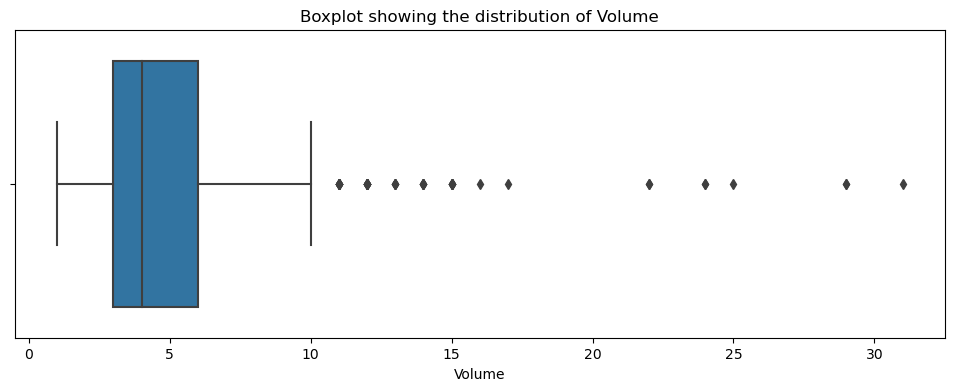

In [26]:
plt.figure(figsize=(12,4))
sns.boxplot(data=numerical_df,x="Volume")
plt.title("Boxplot showing the distribution of Volume")
plt.show()

In [27]:
# outliers are present from points 11 to 31. Because of these outliers data is right skewed

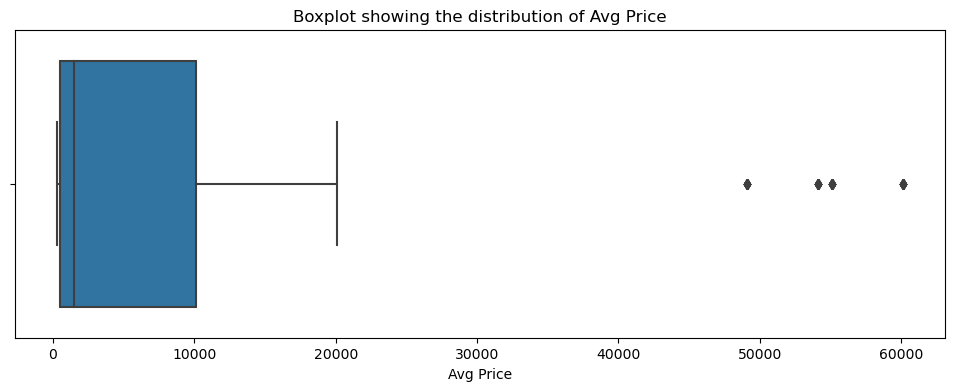

In [28]:
plt.figure(figsize=(12,4))
sns.boxplot(data=numerical_df,x="Avg Price")
plt.title("Boxplot showing the distribution of Avg Price")
plt.show()

In [29]:
# outliers are present from points around 50000 to 60000. Because of these outliers data is right skewed

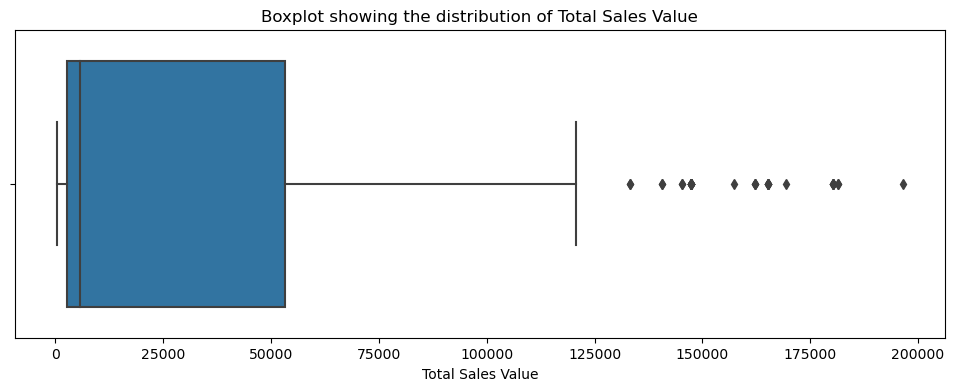

In [30]:
plt.figure(figsize=(12,4))
sns.boxplot(data=numerical_df,x="Total Sales Value")
plt.title("Boxplot showing the distribution of Total Sales Value")
plt.show()

In [31]:
# outliers are present from points around 126000 to 200000. Because of these outliers data is right skewed

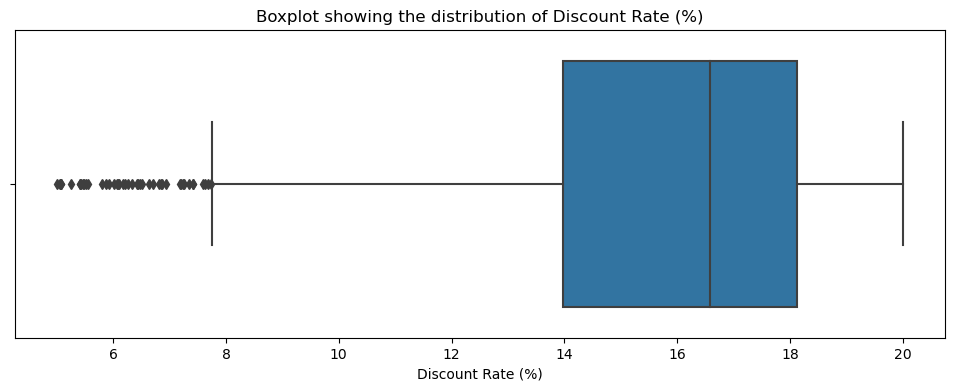

In [32]:
plt.figure(figsize=(12,4))
sns.boxplot(data=numerical_df,x="Discount Rate (%)")
plt.title("Boxplot showing the distribution of Discount Rate (%)")
plt.show()

In [33]:
# outliers are present from points around 0 to 7. Because of these outliers data is left skewed

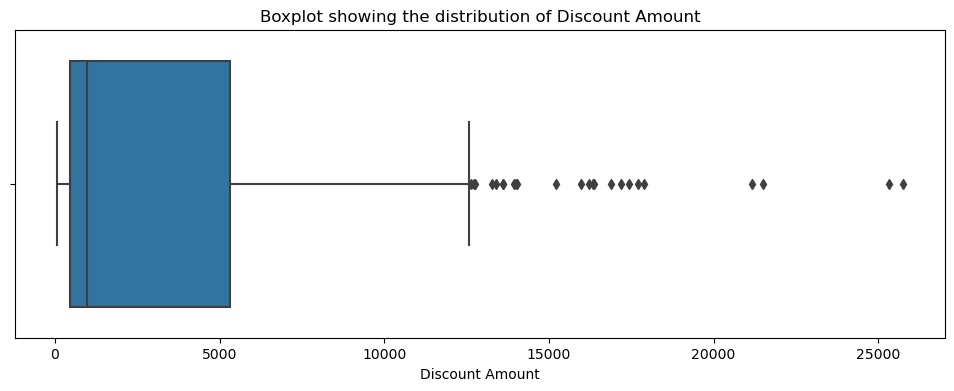

In [34]:
plt.figure(figsize=(12,4))
sns.boxplot(data=numerical_df,x="Discount Amount")
plt.title("Boxplot showing the distribution of Discount Amount")
plt.show()

In [35]:
# outliers are present from points around 12000 to 26000. Because of these outliers data is right skewed

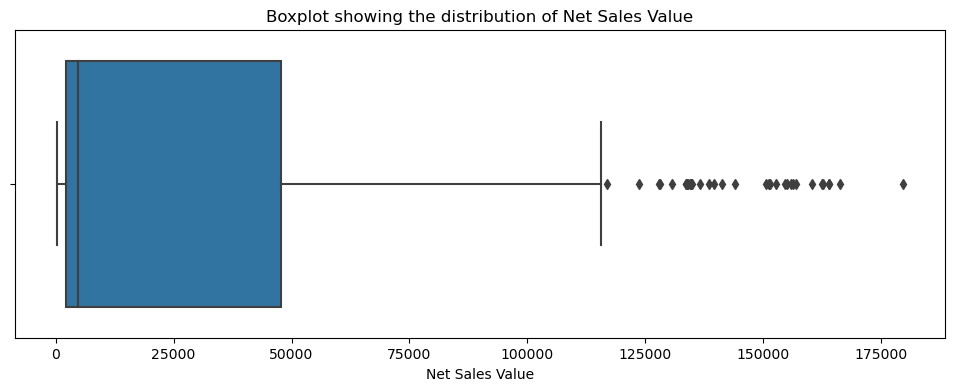

In [36]:
plt.figure(figsize=(12,4))
sns.boxplot(data=numerical_df,x="Net Sales Value")
plt.title("Boxplot showing the distribution of Net Sales Value")
plt.show()

In [37]:
# outliers are present from points around 120000 to 180000. Because of these outliers data is right skewed

### Bar Chart Analysis for Categorical Column

In [38]:
categorical_df = df.select_dtypes(include=["object"])

In [39]:
categorical_df.head()

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98


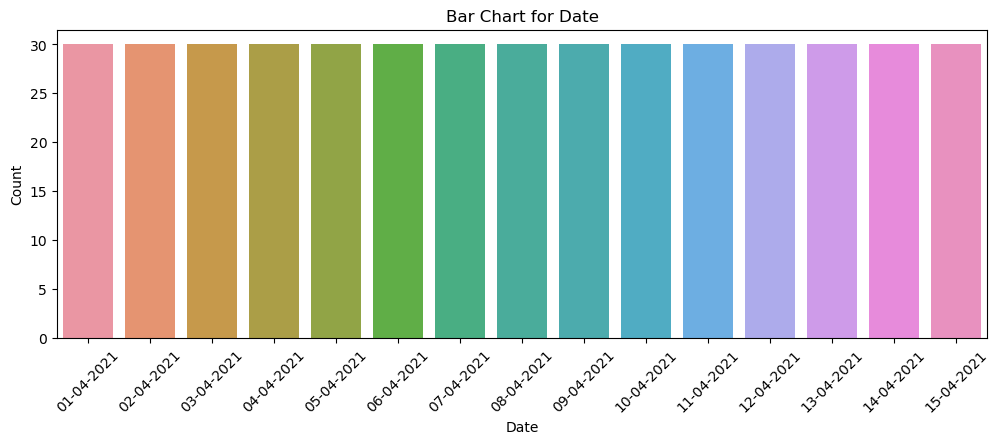

In [40]:
plt.figure(figsize=(12,4))
sns.barplot(data=categorical_df,x=categorical_df["Date"].value_counts().index,y=categorical_df["Date"].value_counts().values)
plt.ylabel("Count")
plt.title("Bar Chart for Date")
plt.xticks(rotation=45)
plt.show()

In [41]:
# 15 dates are present and all dates have same count

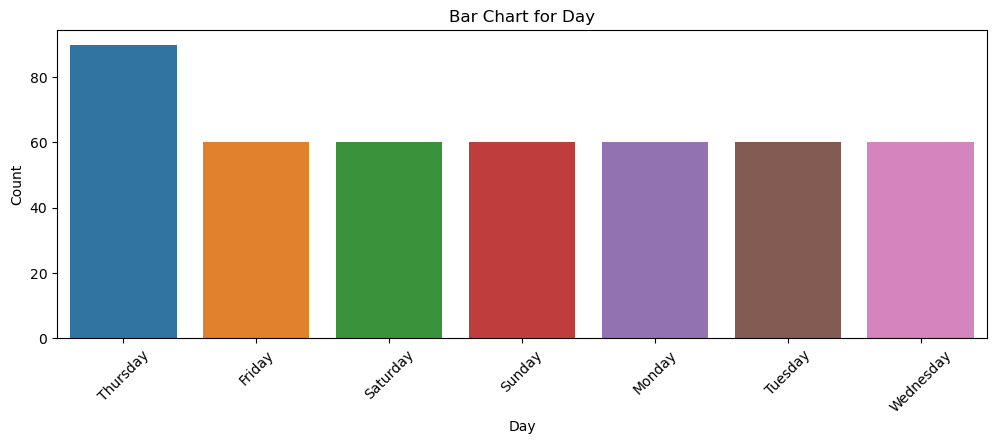

In [42]:
plt.figure(figsize=(12,4))
sns.barplot(data=categorical_df,x=categorical_df["Day"].value_counts().index,y=categorical_df["Day"].value_counts().values)
plt.ylabel("Count")
plt.title("Bar Chart for Day")
plt.xticks(rotation=45)
plt.show()

In [43]:
# all weekdays are present but thursday count is highest among all and rest all have same count

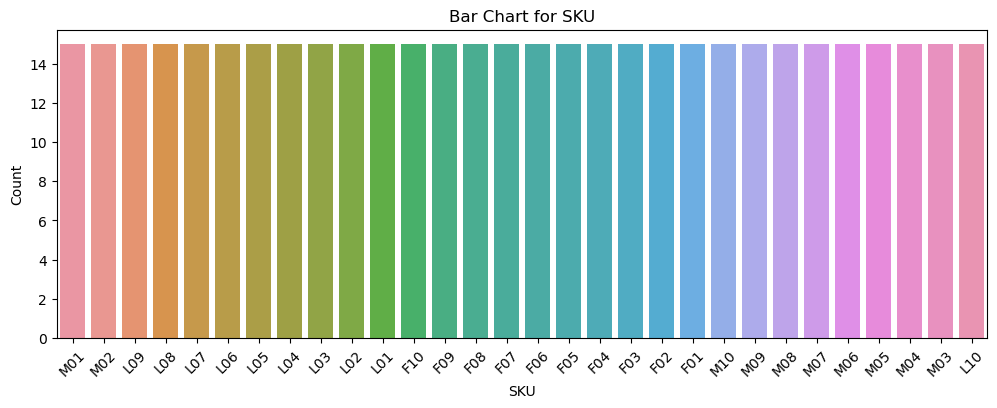

In [44]:
plt.figure(figsize=(12,4))
sns.barplot(data=categorical_df,x=categorical_df["SKU"].value_counts().index,y=categorical_df["SKU"].value_counts().values)
plt.ylabel("Count")
plt.title("Bar Chart for SKU")
plt.xticks(rotation=45)
plt.show()

In [45]:
# All have same count

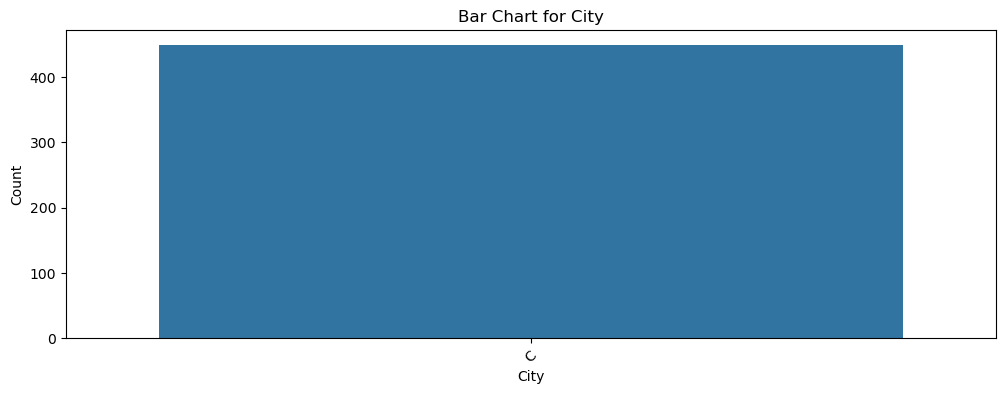

In [46]:
plt.figure(figsize=(12,4))
sns.barplot(data=categorical_df,x=categorical_df["City"].value_counts().index,y=categorical_df["City"].value_counts().values)
plt.ylabel("Count")
plt.title("Bar Chart for City")
plt.xticks(rotation=45)
plt.show()

In [47]:
# only once city C

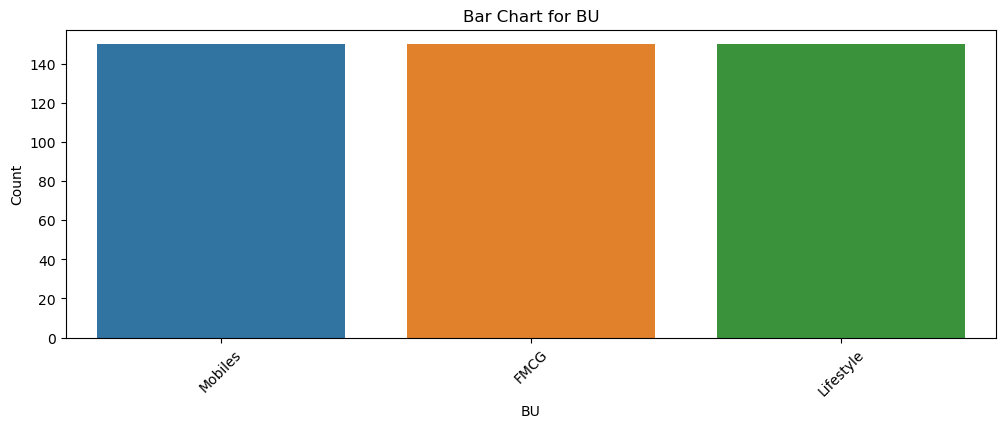

In [48]:
plt.figure(figsize=(12,4))
sns.barplot(data=categorical_df,x=categorical_df["BU"].value_counts().index,y=categorical_df["BU"].value_counts().values)
plt.ylabel("Count")
plt.title("Bar Chart for BU")
plt.xticks(rotation=45)
plt.show()

In [49]:
# 3 different business units with equal count

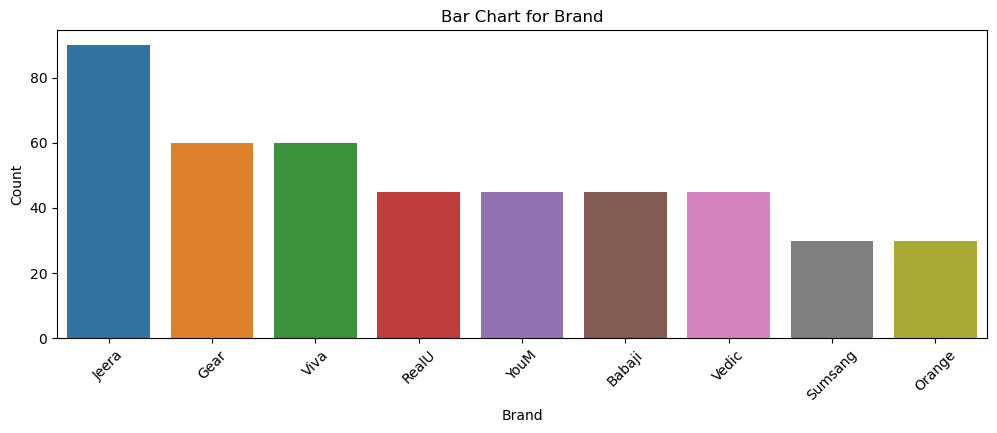

In [50]:
plt.figure(figsize=(12,4))
sns.barplot(data=categorical_df,x=categorical_df["Brand"].value_counts().index,y=categorical_df["Brand"].value_counts().values)
plt.ylabel("Count")
plt.title("Bar Chart for Brand")
plt.xticks(rotation=45)
plt.show()

In [51]:
# Jeera brand has the highest count, followed by gerar and viva, RealU, YouM, Babaji and vedic have same count stands 3rd
# Sumsang and Orange are the least

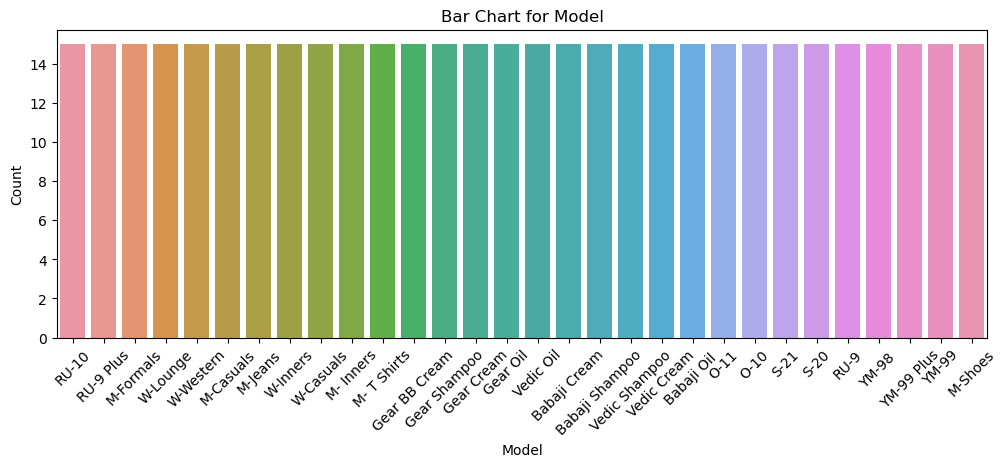

In [52]:
plt.figure(figsize=(12,4))
sns.barplot(data=categorical_df,x=categorical_df["Model"].value_counts().index,y=categorical_df["Model"].value_counts().values)
plt.ylabel("Count")
plt.title("Bar Chart for Model")
plt.xticks(rotation=45)
plt.show()

In [53]:
# All models have count

## Standardization of Numerical Variables

In [54]:
numerical_df.agg(["mean","std"])

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624


In [55]:
# Before standardization

In [56]:
z = (numerical_df-numerical_df.mean())/numerical_df.std()

In [57]:
z.agg(["mean","std"])

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
mean,4.934325e-17,3.947460e-17,1.184238e-17,-3.552714e-17,-5.921189e-17,3.947460e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [58]:
# After standardization

In [59]:
# We can see data distribution before and after standardization. After standardization data is distributed around mean 0 and
# standard deviation 1

## Conversion of Categorical Data into Dummy Variables

In [60]:
# ML algorithims wont understard string data instead they will understand only numerical data. So, there is necessary to convert
# categorical data into the dummy variables (one-hot encoding)

In [61]:
dummy_df = pd.get_dummies(data=categorical_df,dtype="int64")

In [62]:
dummy_df.head()

,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,Date_06-04-2021,Date_07-04-2021,Date_08-04-2021,Date_09-04-2021,Date_10-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Conclusion

In [63]:
# To summarize the key findings are

# Descriptive Analytics
# "Volume" and "Discount Rate(%)" columns has close mean and moderate standard deviation
# "Avg Price", "Total Sales Value", "Discount Amount" and "Net Sales Value" has high variability

# Data Visualization
# Discount Rate (%) is left skewed rest all numerical columns are right skewed
# Every numerical variable has outlier
# Almost every categorical variable has same count except few

# Standardization play a key in bringing all variable to one scale so it is easy to train the Ml algorithms
# One-hot encoding help to convert strig value to numerical values where ML algorithms only understands the numerical values.